# Target peak

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volume import NegativeVolumeIndexIndicator
from ta.volatility import BollingerBands
df = pd.read_csv("../data/BTCUSDT-minute.csv")

In [196]:
# Temporary solution
import sys
sys.path.insert(0, '..')
import useful_functions as uf
import target as target

In [197]:
# df = df[-40000:]

In [198]:
i = NegativeVolumeIndexIndicator(df.close, df.volume)
nvi_o_close = pd.Series(list(map(lambda n, c: n/c, i.negative_volume_index(), df.close)))
nvi = uf.get_rate(uf.get_moving_average(nvi_o_close, 50))
df["nvi"] = list(map(lambda x: 1-x, uf.classify(nvi, 0.)))

target_base = target.get_wr_target(df.close, 500, 0., peak=True) #Default 200
df["target_base"] = target.get_wr_target(df.close, 500, 0., peak=True) #Default 200

target_nvi = target.zip_target(target_base, df.nvi)
df["target_nvi"] = target.zip_target(target_base, df.nvi)


i = BollingerBands(df.close, window=100, window_dev=2)
df["bb"] = i.bollinger_pband()
df["bb"] = uf.classify(df.bb, 0.8)
df["target"] = target.zip_target(target_base, df.bb)

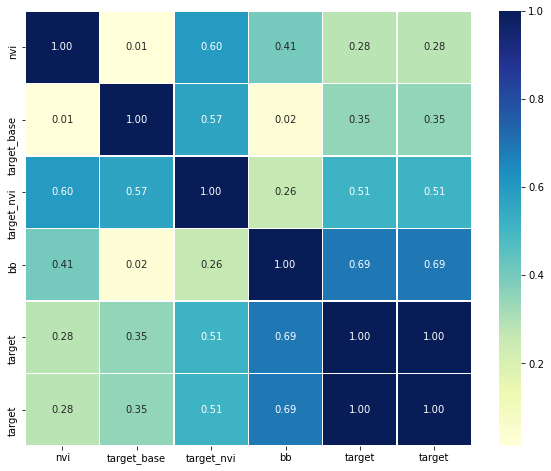

In [199]:
indicators = list(df.columns)[12:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [200]:
d = df[3000:6000]

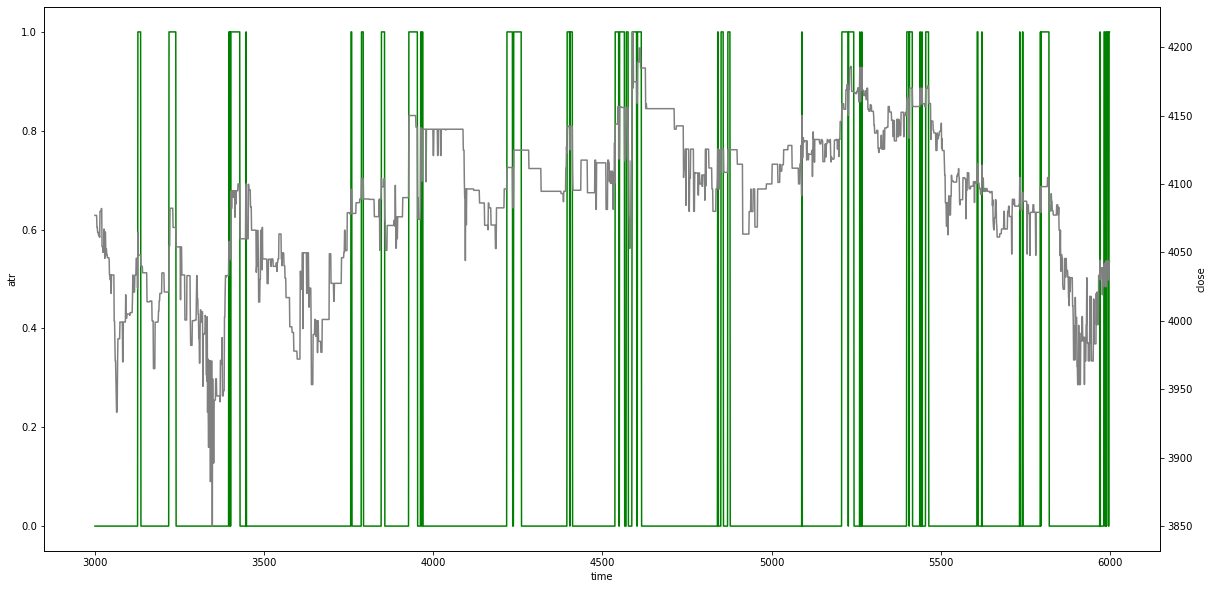

In [201]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.target,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

In [202]:
df.target.value_counts(), df.target.value_counts()[1]/df.target.value_counts()[0]

(0    1766667
 1     222071
 Name: target, dtype: int64,
 0.1257005423206524)

In [203]:
df.to_csv("../data/BTCUSDT-minute-target-peak.csv", index=False) #Default